# Analysing LAPD Output generated through Plasma VLab

You have two options
1. Use the provided sample data path
OR
2. Provide the path to your own experiment data. This path can be obtained with your own executed experiments in Plasma VLab

In [1]:
%pip install -qU "airavata-python-sdk[notebook]"
import airavata_jupyter_magic

%authenticate

# PLEASE NOTE: At a given time, ONLY run a single analysis in one of the available clusters: Anvil OR Jetstream. 
# Make sure the resoruce you want to execute on is enabled.

# Anvil
#%request_runtime test_cpu --file=cybershuttle.yml --group=Gkeyll --walltime=60 --use=AnvilCPU:shared

# Jetstream
%request_runtime test_cpu --file=cybershuttle.yml --group=Gkeyll --walltime=60 --use=Gkeyll:cloud

%wait_for_runtime test_cpu --live
%switch_runtime test_cpu

Note: you may need to restart the kernel to use updated packages.

Loaded airavata_jupyter_magic (2.1.4.post4) 
(current runtime = local)

  %authenticate                              -- Authenticate to access high-performance runtimes.
  %request_runtime <rt> [args]               -- Request a runtime named <rt> with configuration <args>.
                                                Call multiple times to request multiple runtimes.
  %restart_runtime <rt>                      -- Restart runtime <rt> if it hangs. This will clear all variables.
  %stop_runtime <rt>                         -- Stop runtime <rt> when no longer needed.
  %wait_for_runtime <rt>                     -- Wait for runtime <rt> to be ready.
  %switch_runtime <rt>                       -- Switch the active runtime to <rt>. All subsequent cells will run here.
  %%run_on <rt>                              -- Force a cell to always execute on <rt>, regardless of the active runtime.
  %stat_runtime <rt>               

Output()

Authenticated.

Requesting runtime=test_cpu...
[Gkeyll:cloud, 60 Minutes, 1 Node(s), 4 CPU(s), 1 GPU(s), 4096 MB RAM, 1024 MB VRAM]
* modules=[]
* libraries=['python=3.11', 'pip']
* pip=['postgkyl', 'jupyterlab_widgets', 'ipywidgets', 'ipympl']
* mounts=[]
Requested runtime=test_cpu
Request successful: runtime=test_cpu


Output()

local:/tmp/connection_a1at81ec.json --> test_cpu:connection_a1at81ec.json... [200]
started proc_name=test_cpu_kernel on rt=test_cpu. pid=2428
forwarding ports=[19330, 19331, 19332, 19333, 19334]
test_cpu:19330 -> access via 18.118.140.230:10000
test_cpu:19331 -> access via 18.118.140.230:10001
test_cpu:19332 -> access via 18.118.140.230:10002
test_cpu:19333 -> access via 18.118.140.230:10003
test_cpu:19334 -> access via 18.118.140.230:10004
started ipykernel tunnels for test_cpu at 18.118.140.230
started ipykernel client for test_cpu
Remote Jupyter kernel launched and connected for runtime=test_cpu.
Switched to runtime=test_cpu.


In [2]:
#Provide your own LAPD output path from https://vlab.plasmascience.scigap.org/ experiment. If not, use the provided Example path

#Example Path
data_path = "/export/vlab_workdirs/LDAP-Sample/"
!ls {data_path}


#Your LAPD Path (Comment the above Example data path. Add your Path here and uncomment.)
#data_path = "/export/vlab_workdirs/PROCESS_79949f46-eb69-4425-8cd3-e2cd95b07c37/"

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
LAPD3D5Mg0-field-energy.gkyl  LAPD3D5Mg0-field_32.gkyl
LAPD3D5Mg0-field_0.gkyl       LAPD3D5Mg0-field_33.gkyl
LAPD3D5Mg0-field_1.gkyl       LAPD3D5Mg0-field_34.gkyl
LAPD3D5Mg0-field_10.gkyl      LAPD3D5Mg0-field_35.gkyl
LAPD3D5Mg0-field_100.gkyl     LAPD3D5Mg0-field_36.gkyl
LAPD3D5Mg0-field_101.gkyl     LAPD3D5Mg0-field_37.gkyl
LAPD3D5Mg0-field_102.gkyl     LAPD3D5Mg0-field_38.gkyl
LAPD3D5Mg0-field_103.gkyl     LAPD3D5Mg0-field_39.gkyl
LAPD3D5Mg0-field_104.gkyl     LAPD3D5Mg0-field_4.gkyl
LAPD3D5Mg0-field_105.gkyl     LAPD3D5Mg0-field_40.gkyl
LAPD3D5Mg0-field_106.gkyl     LAPD3D5Mg0-field_41.gkyl
LAPD3D5Mg0-field_107.gkyl     LAPD3D5Mg0-field_42.gkyl
LAPD3D5Mg0-field_108.gkyl     LAPD3D5Mg0-field_43.gkyl
LAPD3D5Mg0-field_109.gkyl     LAPD3D5Mg0-field_44.gkyl
LAPD3D5Mg0-field_11.gkyl      LAPD3D5Mg0-field_45.gkyl
LAPD3D5Mg0-field_110.gkyl     LAPD3D5Mg0-field_46.gkyl
LAPD3D5Mg0-field_111.gkyl     LAPD3D5Mg0-field_47

In [3]:
from ipywidgets import widgets
from ipywidgets import FloatSlider
from IPython.display import display # Optional: to explicitly display the widget


# Create a couple RadioButtons widgets
optA = widgets.RadioButtons(
    options=['To seek the holy grail!', 'I\'m not telling.'],  #  Provide the list of options
    description='What is your quest?', # Optional: Add a description
    disabled=False  # Optional: Enable/disable the widget
)
optB = widgets.RadioButtons(
    options=['Red', 'Blue', 'Green'],  #  Provide the list of options
    description='What is your favorite colour?', # Optional: Add a description
    disabled=False  # Optional: Enable/disable the widget
)

# Create a FloatSlider
float_slider = widgets.FloatSlider(
    value=7.5,
    min=0.0,
    max=10.0,
    step=0.1,
    readout=True  # Hide the default readout
)

value_display = widgets.Label() # Create a label widget to display the value

def update_value_display(change):
    value_display.value = f"Answer: {change['new']:.1f}"

float_slider.observe(update_value_display, names='value') # Link the slider and the label
description = widgets.Label("What is the airspeed velocity of an unladen swallow? (m/s)")
display(optA,optB,description,float_slider,value_display)



executing cell on test_cpu...
waiting for cell to finish on test_cpu...


RadioButtons(description='What is your quest?', options=('To seek the holy grail!', "I'm not telling."), value…

RadioButtons(description='What is your favorite colour?', options=('Red', 'Blue', 'Green'), value='Red')

Label(value='What is the airspeed velocity of an unladen swallow? (m/s)')

FloatSlider(value=7.5, max=10.0)

Label(value='')

cell finished on test_cpu.


In [8]:
!jupyter kernelspec list
!cat /opt/conda/share/jupyter/kernels/python3/kernel.json
!python --version
!pip list

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
Available kernels:
  python3    /export/cybershuttle-home/scratch/envs/5efadfec/share/jupyter/kernels/python3
cat: /opt/conda/share/jupyter/kernels/python3/kernel.json: No such file or directory
Python 3.11.13
Package                 Version
----------------------- -----------
asttokens               3.0.0
blinker                 1.9.0
blosc2                  3.2.1
certifi                 2025.1.31
charset-normalizer      3.4.1
click                   8.1.8
comm                    0.2.2
contourpy               1.3.1
cycler                  0.12.1
debugpy                 1.8.14
decorator               5.2.1
exceptiongroup          1.3.0
executing               2.2.0
Flask                   3.1.1
fonttools               4.56.0
idna                    3.10
importlib_metadata      8.7.0
ipykernel               6.29.5
ipympl                  0.9.7
ipython                 9.3.0
ipython_pygments_lexers 1.1.1
ipywidgets   

In [7]:
print(f"You selected: {optA.value}, {optB.value}, {float_slider.value}")
x=optA.value
!echo {optA.value}

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
You selected: To seek the holy grail!, Red, 7.5
To seek the holy grail!
cell finished on test_cpu.


In [10]:
%%bash
date=$(date +"%Y-%H-%M-%S")
mkdir run_$date
cd run_$date
export GKYL=/export/g0soft/gkeyllSoft/gkylzero/bin/gkyl
export PGKYL_ENV=/export/g0dev/pgkyl/bin/activate
grid="16x150"
tend=10.0
nframes=20
bkgrnd="Flat_vA_profile.txt"
j0=1.0e4
driveFreq=7.64e4
antRamp=3.27e-6
tAntOff=1.96e-05
lAnt=0.2178
elcTemp=7
teti=5
n0=7e18
/export/vlabApps/lapd/lapd.sh $grid $tend $nframes $bkgrnd $j0 $driveFreq $antRamp $tAntOff $lAnt $elcTemp $teti $n0

bash: line 18: /export/vlabApps/lapd/lapd.sh: No such file or directory


CalledProcessError: Command 'b'date=$(date +"%Y-%H-%M-%S")\nmkdir run_$date\ncd run_$date\nexport GKYL=/export/g0soft/gkeyllSoft/gkylzero/bin/gkyl\nexport PGKYL_ENV=/export/g0dev/pgkyl/bin/activate\ngrid="16x150"\ntend=10.0\nnframes=20\nbkgrnd="Flat_vA_profile.txt"\nj0=1.0e4\ndriveFreq=7.64e4\nantRamp=3.27e-6\ntAntOff=1.96e-05\nlAnt=0.2178\nelcTemp=7\nteti=5\nn0=7e18\n/export/vlabApps/lapd/lapd.sh $grid $tend $nframes $bkgrnd $j0 $driveFreq $antRamp $tAntOff $lAnt $elcTemp $teti $n0\n'' returned non-zero exit status 127.

In [16]:
ls .

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
A2125638087         airavata-agent*           job_812284673.slurm  test.sh
GkeyllAgent.stderr  application@              kernel.py            test2.sh*
GkeyllAgent.stdout  connection_zjabj0j0.json  micromamba*
cell finished on test_cpu.


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import postgkyl as pg
import numpy as np
import shutil

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 22
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#Note: This cell may execute longer if the job is not yet active in the remote cluster. Please pause till the status =READY message appears.

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


In [4]:
# Physical constants and derived parameters
gas_gamma = 5.0 / 3.0 # Adiabatic index.
cFac = 1000 # Scales the speed of light
epsilon0 = 8.854e-12*cFac # Permittivity of free space.
mu0 =  1.257e-6 # Permeability of free space.
light_speed = 1.0/np.sqrt(epsilon0*mu0) # Speed of light. 
eV = 1.6e-19 # electron Volt for charge and temperature
mass_proton = 1.67e-27
mass_ion = 4.*mass_proton # Helium mass.
charge_ion = 1.0*eV # Ion charge.
mass_elc = mass_ion / 100 # Reduced electron mass.
charge_elc = -1.0*eV # Electron charge.
Te_over_Ti = 5.0 # Electron temperature / ion temperature.
n0 = 7.e18 # Number density.
wpi = np.sqrt(charge_ion**2 * n0 / (epsilon0 * mass_ion)) # Ion plasma frequency. 
wpe = np.sqrt(charge_ion**2 * n0 / (epsilon0 * mass_elc)) # Electron plasma frequency. 
di = light_speed/wpi # Ion inertial length. 
de = light_speed/wpe # Electron inertial length. 
B0 = 0.08 # Reference magnetic field strength at z = 0.
omega_ci0 = charge_ion * B0 / mass_ion # Reference ion cyclotron frequency. 
vA0p = B0/np.sqrt(mu0*n0*mass_ion) # Reference Alfven speed. 

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


### $\texttt{Gkeyll}$ and $\texttt{postgkyl}$

The code we will be using is [$\texttt{Gkeyll}$](https://gkeyll.readthedocs.io/), a general purpose simulation framework for a variety of fluid and plasma systems. You can download and install $\texttt{Gkeyll}$ yourself by following the installation instructions on our [Github repo](https://github.com/ammarhakim/gkylzero). 

To read the data, we will utilize the post-processing suite we have developed alongside $\texttt{Gkeyll}$, [$\texttt{postgkyl}$](https://github.com/ammarhakim/postgkyl), which you can also download and install via the instructions on Github. The cluster we will be utilizing for analyzing the results of our simulations already has installations of $\texttt{Gkeyll}$ and $\texttt{postgkyl}$; we already imported postgkyl in this Jupyter Notebook, so if we did not have $\texttt{postgkyl}$, that import command would not have worked! 

The output of $\texttt{Gkeyll}$ simulations can be manipulated in one of two ways: through the GData class, which retains useful metadata from the simulation to subsequent operations, or by directly fetching the raw values and grid and storing them in Numpy arrays for our subsequent manipulations.

In [5]:
def read_data(filebase, data_type, frame, zs=[None]*6):
    raw_data = pg.data.GData("%s-%s_%d.gkyl" % (filebase, data_type, frame), z0=zs[0], z1=zs[1], z2=zs[2], z3=zs[3], z4=zs[4], z5=zs[5]) 
    data = raw_data.get_values()  
    time = raw_data.ctx['time']
    # Same grid for all electrons, ions, and EM fields
    coords = raw_data.get_grid()
    # Center the grid values
    for d in range(len(coords)):
        coords[d] = 0.5*(coords[d][:-1] + coords[d][1:])

    return coords, data, time

def data_range(coords, lowerLimits, upperLimits):
    dims = len(coords)
    zs = [None]*6
    for d in range(dims):
        idxs = np.searchsorted(coords[d], [lowerLimits[d], upperLimits[d]])
        if idxs[0] == idxs[1]: 
            zs[d] = '{0}'.format(idxs[0])
        else:
            zs[d] = '{0}:{1}'.format(idxs[0], idxs[1])
    return zs

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


In [6]:
filebase = data_path + "LAPD3D5Mg0" #Filename base
startFrame = 0; endFrame = 150; skipFrames = 1 #Start and end frames to be read. skipFrames defines the stride
lowerLimits = [0.,  0., 0.2] #lowerLimits of data to read in units defined in input file
upperLimits = [0.,  0.,  1.e6] #upperLimits of data

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


Here, we will only be looking at EM field data; however, you can read in moment data by changing data_type to elc or ion, where the names can be determined from the output filenames. The final index in the data array is the component of the EM field or moment data. A glossary of the components can be found below

field

0 - 2 = Ex, Ey, Ez

3 - 5 = Bx, By, Bz

6, 7 = auxilliary fields

moment data

0 = rho = mass*density

1 - 3 = rho*u_i = momentum density

4 = energy =  density * temperature / (gas_gamma - 1) + 0.5 * rho (ux^2 + uy^2 + uz^2)

In [7]:
data_type = "field" #field for EM fields, elc for electron moments, ion for ion moments. Follows naming convention of output files.
coords, data, time = read_data(filebase, data_type, startFrame) #Initial read needed for data range selection
zs = data_range(coords, lowerLimits, upperLimits) #Setup range of data to read

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


In [8]:
#Read in all selected EM field data

frames = np.arange(startFrame, endFrame+1, skipFrames); nt=len(frames)
timeseries = []
time = np.zeros(nt)
for it in range(nt):
    coords, data, time[it] = read_data(filebase, data_type, frames[it], zs)
    timeseries.append(data)
timeseries = np.array(timeseries) #Array shape (time, x, y, z, component)

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


executing cell on test_cpu...
waiting for cell to finish on test_cpu...


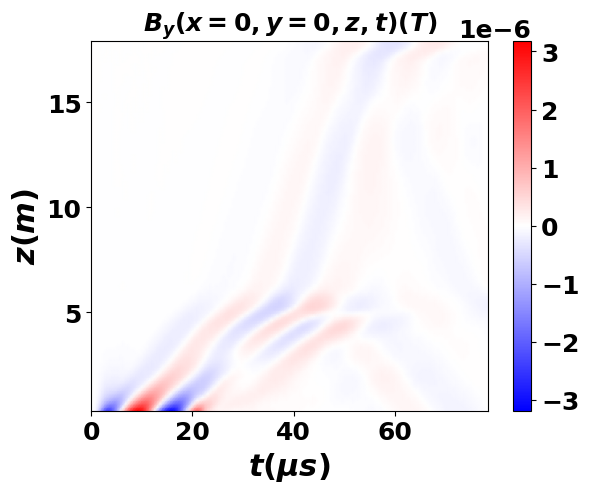

cell finished on test_cpu.


In [9]:
Ex = timeseries[...,0]
Ey = timeseries[...,1]
Bx = timeseries[...,3]
By = timeseries[...,4]
z = coords[2]

maxLim = np.max(abs(By))
plt.figure()
plt.pcolormesh(time*1e6, z, By[:,0,0,:].transpose(), cmap='bwr', shading='gouraud')
plt.clim(-maxLim, maxLim)
plt.colorbar()
plt.xlabel(r'$t(\mu s)$')
plt.ylabel(r'$z(m)$')
plt.title(r'$B_y(x=0,y=0,z,t)(T)$')
plt.show()


executing cell on test_cpu...
waiting for cell to finish on test_cpu...


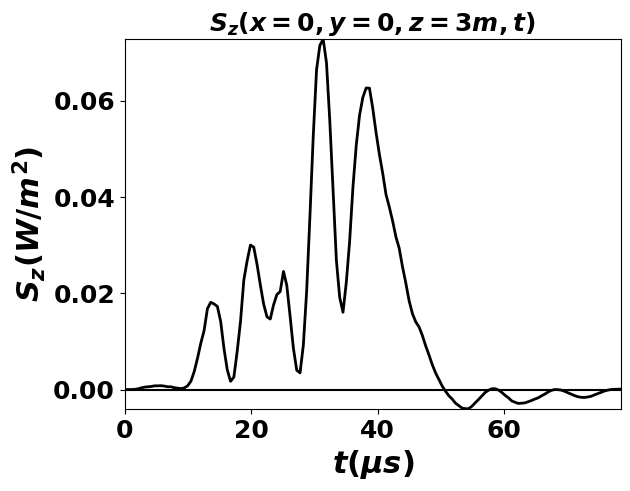

cell finished on test_cpu.


In [10]:
#Compute and plot axial Poynting flux
Sz = (Ex*By - Ey*Bx) / mu0 
iz = np.searchsorted(z, 3.) #Find index for z=3m

plt.figure()
plt.plot(time*1e6, Sz[:,0,0,iz].transpose(),'k', linewidth=2)
plt.plot(time*1e6, np.zeros(nt), 'k')
plt.xlabel(r'$t(\mu s)$')
plt.ylabel(r'$S_z(W/m^2)$')
plt.title(r'$S_z(x=0,y=0,z=3m,t)$')
plt.autoscale(enable=True, axis='both', tight=True)
plt.show()

In [9]:
%stop_runtime test_cpu
%switch_runtime local

Terminated runtime=test_cpu. state={'experimentId': 'CS_Agent_755abb2b-4bc1-497b-b4cd-aa13651f8c5a', 'terminated': True}
Switched to runtime=local.
